# NFL Combine Data Analysis - WR

## Kevin Petruzzelli

#### Import Libraries

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import pylab as pl
import numpy as np
import sklearn

#### Load Combine Data that will be used in the analysis

In [82]:
df_combine = pd.read_csv("Combine_Data.csv")
print df_combine.isnull().sum().sort_values(ascending=False) 

print("Combine Data Shape", df_combine.shape)

Unnamed: 27          4945
Unnamed: 26          4945
pick                 1789
college              1470
picktotal               2
fortyyd                 0
name                    0
firstname               0
lastname                0
position                0
heightfeet              0
heightinches            0
heightinchestotal       0
weight                  0
arms                    0
hands                   0
tenyd                   0
twentyyd                0
twentyss                0
threecone               0
vertical                0
broad                   0
bench                   0
round                   0
pickround               0
wonderlic               0
nflgrade                0
year                    0
dtype: int64
('Combine Data Shape', (4947, 28))


#### Drop Uneccessary Columns and View Data

In [83]:
df_combine.drop(['Unnamed: 26', 'Unnamed: 27'], axis = 1, inplace = True)
df_combine = df_combine.convert_objects(convert_numeric=True)
df_combine = df_combine.replace(0,df_combine.median())
df_combine.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,vertical,broad,bench,round,college,pick,pickround,picktotal,wonderlic,nflgrade
0,2015,"Abdullah, Ameer",Ameer,Abdullah,RB,5.0,9.0,69.0,205,0.0,...,42.50,130.0,24.0,2,NaN,NaN,7.0,42.0,0,5.9
1,2015,"Agholor, Nelson",Nelson,Agholor,WR,6.0,4.0,72.0,198,0.0,...,35.54,120.0,12.0,2,NaN,NaN,7.0,42.0,0,5.6
2,2015,"Ajayi, Jay",Jay,Ajayi,RB,6.0,4.0,72.0,221,0.0,...,39.00,121.0,19.0,2,NaN,NaN,7.0,42.0,0,6.0
3,2015,"Alexander, Kwon",Kwon,Alexander,OLB,6.0,1.0,73.0,227,0.0,...,36.00,121.0,24.0,2,NaN,NaN,7.0,42.0,0,5.4
4,2015,"Alford, Mario",Mario,Alford,WR,5.0,8.0,68.0,180,0.0,...,34.00,121.0,13.0,2,NaN,NaN,7.0,42.0,0,5.3


#### Create combine dataframe by position

In [84]:
df_wr_combine = df_combine.ix[df_combine['position'] == 'WR']
df_rb_combine = df_combine.ix[df_combine['position'] == 'RB']
df_qb_combine = df_combine.ix[df_combine['position'] == 'QB']

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [85]:
df_wr_combine.head()

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,vertical,broad,bench,round,college,pick,pickround,picktotal,wonderlic,nflgrade
1,2015,"Agholor, Nelson",Nelson,Agholor,WR,6.0,4.0,72.0,198,0.0,...,35.54,120.0,12.0,2,NaN,NaN,7.0,42.0,0,5.6
4,2015,"Alford, Mario",Mario,Alford,WR,5.0,8.0,68.0,180,0.0,...,34.00,121.0,13.0,2,NaN,NaN,7.0,42.0,0,5.3
7,2015,"Anderson, Dres",Dres,Anderson,WR,6.0,1.0,73.0,187,0.0,...,35.54,120.0,13.0,2,NaN,NaN,7.0,42.0,0,5.5
18,2015,"Bell, Kenny",Kenny,Bell,WR,6.0,1.0,73.0,197,0.0,...,41.50,129.0,7.0,2,NaN,NaN,7.0,42.0,0,5.4
30,2015,"Brown, Da'Ron",Da'Ron,Brown,WR,6.0,4.0,72.0,205,0.0,...,37.00,120.0,17.0,2,NaN,NaN,7.0,42.0,0,4.9


In [86]:
df_wr_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631 entries, 1 to 4943
Data columns (total 26 columns):
year                 631 non-null int64
name                 631 non-null object
firstname            631 non-null object
lastname             631 non-null object
position             631 non-null object
heightfeet           631 non-null float64
heightinches         631 non-null float64
heightinchestotal    631 non-null float64
weight               631 non-null int64
arms                 631 non-null float64
hands                631 non-null float64
fortyyd              631 non-null float64
twentyyd             631 non-null float64
tenyd                631 non-null float64
twentyss             631 non-null float64
threecone            631 non-null float64
vertical             631 non-null float64
broad                631 non-null float64
bench                631 non-null float64
round                631 non-null int64
college              0 non-null float64
pick                 48 

#### Identify time period of data

In [87]:
print("Min year of data", df_combine.year.min())
print("Max year of data", df_combine.year.max())

('Min year of data', 1999)
('Max year of data', 2015)


#### Load  wide receiver data

In [88]:
df_receiving = pd.read_csv("Career_Stats_Receiving.csv")
print df_receiving.isnull().sum().sort_values(ascending=False) 

print("Receiving Data Shape", df_receiving.shape)

Position                           15728
Fumbles                                0
First Down Receptions                  0
Receptions Longer than 40 Yards        0
Receptions Longer than 20 Yards        0
Receiving TDs                          0
Longest Reception                      0
Yards Per Game                         0
Yards Per Reception                    0
Receiving Yards                        0
Receptions                             0
Games Played                           0
Team                                   0
Year                                   0
Name                                   0
Player Id                              0
dtype: int64
('Receiving Data Shape', (18128, 16))


In [89]:
df_receiving.head()

,Player Id,Name,Position,Year,Team,Games Played,Receptions,Receiving Yards,Yards Per Reception,Yards Per Game,Longest Reception,Receiving TDs,Receptions Longer than 20 Yards,Receptions Longer than 40 Yards,First Down Receptions,Fumbles
0,fredevans/2513736,"Evans, Fred",NaN,1948,Chicago Bears,3,1,-2,-2,-0.7,--,0,--,--,--,--
1,fredevans/2513736,"Evans, Fred",NaN,1948,Chicago Rockets,0,--,--,--,0.0,--,--,--,--,--,--
2,fredevans/2513736,"Evans, Fred",NaN,1947,Chicago Rockets,0,--,--,--,0.0,--,--,--,--,--,--
3,fredevans/2513736,"Evans, Fred",NaN,1947,Buffalo Bills,0,--,--,--,0.0,--,--,--,--,--,--
4,fredevans/2513736,"Evans, Fred",NaN,1946,Cleveland Browns,0,--,--,--,0.0,--,--,--,--,--,--


#### Remove data that exists in years outside of our combine data set

In [90]:
print ("Count of rows prior to drop",df_receiving['Year'].count())
df_receiving = df_receiving.drop(df_receiving[df_receiving.Year < 1999].index)
df_receiving = df_receiving.drop(df_receiving[df_receiving.Year > 2015].index)
print ("Count of rows post drop",df_receiving['Year'].count())

('Count of rows prior to drop', 18128)
('Count of rows post drop', 5825)


#### Clean receiving data

In [91]:
df_receiving.columns = df_receiving.columns.str.strip()
df_receiving.replace({'--': '0'}, regex=True)
df_receiving = df_receiving.convert_objects(convert_numeric=True)
df_receiving.head(100)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


,Player Id,Name,Position,Year,Team,Games Played,Receptions,Receiving Yards,Yards Per Reception,Yards Per Game,Longest Reception,Receiving TDs,Receptions Longer than 20 Yards,Receptions Longer than 40 Yards,First Down Receptions,Fumbles
6,quinnjohnson/79593,"Johnson, Quinn",NaN,2013,Tennessee Titans,4,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
7,quinnjohnson/79593,"Johnson, Quinn",NaN,2012,Tennessee Titans,16,5.0,40.0,8.0,2.5,17.0,0.0,0.0,0.0,2.0,0.0
8,quinnjohnson/79593,"Johnson, Quinn",NaN,2011,Tennessee Titans,4,3.0,30.0,10.0,7.5,13.0,0.0,0.0,0.0,1.0,0.0
9,quinnjohnson/79593,"Johnson, Quinn",NaN,2011,Denver Broncos,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
10,quinnjohnson/79593,"Johnson, Quinn",NaN,2010,Green Bay Packers,11,3.0,26.0,8.7,2.4,11.0,0.0,0.0,0.0,2.0,0.0
11,quinnjohnson/79593,"Johnson, Quinn",NaN,2009,Green Bay Packers,9,2.0,4.0,2.0,0.4,4.0,0.0,0.0,0.0,0.0,0.0
19,joeadams/2532782,"Adams, Joe",NaN,2012,Carolina Panthers,9,1.0,7.0,7.0,0.8,7.0,0.0,0.0,0.0,0.0,0.0
86,titusyoung/2495253,"Young, Titus",NaN,2012,Detroit Lions,10,33.0,383.0,11.6,38.3,NaN,4.0,5.0,2.0,20.0,0.0
87,titusyoung/2495253,"Young, Titus",NaN,2011,Detroit Lions,16,48.0,607.0,12.6,37.9,NaN,6.0,7.0,4.0,33.0,1.0
93,brandontate/81306,"Tate, Brandon",WR,2015,Cincinnati Bengals,16,2.0,59.0,29.5,3.7,NaN,1.0,1.0,1.0,1.0,0.0


#### Create average receiving yards and average touchdowns per season data set

In [92]:
df_receivingyds_mean = df_receiving.groupby('Name', as_index=False)[['Receiving Yards','Receiving TDs']].mean()
df_receivingyds_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294 entries, 0 to 1293
Data columns (total 3 columns):
Name               1294 non-null object
Receiving Yards    1241 non-null float64
Receiving TDs      1246 non-null float64
dtypes: float64(2), object(1)
memory usage: 40.4+ KB


In [93]:
df_receivingyds_mean.columns

Index([u'Name', u'Receiving Yards', u'Receiving TDs'], dtype='object')

In [94]:
df_receivingyds_mean = df_receivingyds_mean.convert_objects(convert_numeric=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [95]:
df_receivingyds_mean.fillna(0)

,Name,Receiving Yards,Receiving TDs
0,"Abbrederis, Jared",111.000000,0.000000
1,"Abdul-Quddus, Isa",3.000000,0.000000
2,"Abdullah, Ameer",183.000000,1.000000
3,"Abdullah, Rabih",23.000000,0.000000
4,"Adams, Charlie",101.500000,0.000000
5,"Adams, Davante",464.500000,2.000000
6,"Adams, Joe",7.000000,0.000000
7,"Adams, Kris",26.000000,0.000000
8,"Adams, Kyle",40.000000,0.000000
9,"Addai, Joseph",241.333333,1.500000


In [96]:
df_receivingyds_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294 entries, 0 to 1293
Data columns (total 3 columns):
Name               1294 non-null object
Receiving Yards    1241 non-null float64
Receiving TDs      1246 non-null float64
dtypes: float64(2), object(1)
memory usage: 40.4+ KB


#### Join receiving data to combine data

In [97]:
df_receivingyds_mean.rename(columns={'Name': 'WRName', 'Receiving Yards': 'SeasonAvgRecYds', 'Receiving TDs':'SeasonAvgRecTDs'}, inplace=True)

In [98]:
df_wr_clean = df_wr_combine.merge(df_receivingyds_mean, left_on='name', right_on='WRName', how='left')

In [99]:
df_wr_clean.fillna(df_wr_clean.mean())
df_wr_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631 entries, 0 to 630
Data columns (total 29 columns):
year                 631 non-null int64
name                 631 non-null object
firstname            631 non-null object
lastname             631 non-null object
position             631 non-null object
heightfeet           631 non-null float64
heightinches         631 non-null float64
heightinchestotal    631 non-null float64
weight               631 non-null int64
arms                 631 non-null float64
hands                631 non-null float64
fortyyd              631 non-null float64
twentyyd             631 non-null float64
tenyd                631 non-null float64
twentyss             631 non-null float64
threecone            631 non-null float64
vertical             631 non-null float64
broad                631 non-null float64
bench                631 non-null float64
round                631 non-null int64
college              0 non-null float64
pick                 48 n

#### Explore variable correlations

                    fortyyd  threecone  vertical     bench     broad  \
fortyyd            1.000000   0.134090 -0.316488 -0.074270 -0.380953   
threecone          0.134090   1.000000 -0.082827 -0.004689 -0.074073   
vertical          -0.316488  -0.082827  1.000000  0.130142  0.561642   
bench             -0.074270  -0.004689  0.130142  1.000000  0.136689   
broad             -0.380953  -0.074073  0.561642  0.136689  1.000000   
heightinchestotal  0.188755   0.153032 -0.006158  0.061476  0.125608   
weight             0.209352   0.184679  0.007257  0.190459  0.077469   

                   heightinchestotal    weight  
fortyyd                     0.188755  0.209352  
threecone                   0.153032  0.184679  
vertical                   -0.006158  0.007257  
bench                       0.061476  0.190459  
broad                       0.125608  0.077469  
heightinchestotal           1.000000  0.705060  
weight                      0.705060  1.000000  


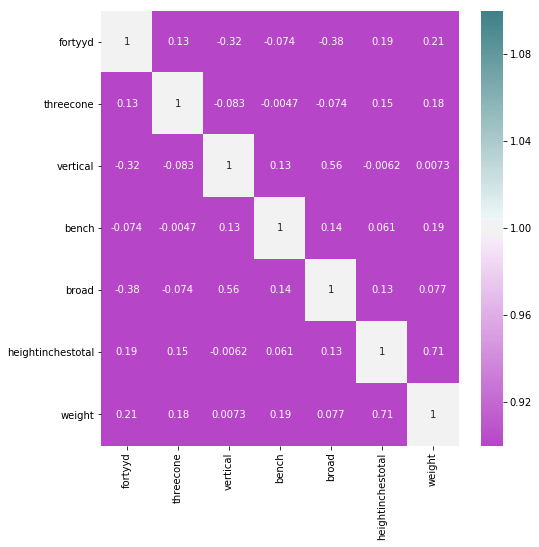

In [100]:
plt.figure(figsize=(8,8))
cmap = sns.diverging_palette(300, 200, as_cmap=True)

correlations = df_wr_clean[['fortyyd', 'threecone', 'vertical', 'bench','broad', 'heightinchestotal', 'weight']].corr()
print(correlations)
sns.heatmap(correlations, cmap=cmap, vmin = 1, vmax = 1, annot = True)


In [101]:
df_wr_clean = df_wr_clean[np.isfinite(df_wr_clean['SeasonAvgRecYds'])]
df_wr_clean = df_wr_clean[np.isfinite(df_wr_clean['SeasonAvgRecTDs'])]
df_wr_clean.head(1)

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,round,college,pick,pickround,picktotal,wonderlic,nflgrade,WRName,SeasonAvgRecYds,SeasonAvgRecTDs
0,2015,"Agholor, Nelson",Nelson,Agholor,WR,6.0,4.0,72.0,198,0.0,...,2,NaN,NaN,7.0,42.0,0,5.6,"Agholor, Nelson",283.0,1.0


#### Create WR regression models

In [102]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
wr_yd_lm = LinearRegression()
wr_yd_lm_lasso = Lasso()
wr_yd_lm_ridge = Ridge()
wr_yd_lm_gradient = SGDRegressor()

#### Create target and predictor variables

In [103]:
X = df_wr_clean[['fortyyd', 'threecone', 'vertical', 'bench','broad', 'heightinchestotal', 'weight']]
y = df_wr_clean[['SeasonAvgRecYds']]

In [104]:
import statsmodels.api as sm

model = sm.OLS(y,X)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:        SeasonAvgRecYds   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     56.53
Date:                Tue, 20 Mar 2018   Prob (F-statistic):           9.64e-48
Time:                        10:36:00   Log-Likelihood:                -1747.5
No. Observations:                 253   AIC:                             3509.
Df Residuals:                     246   BIC:                             3534.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
fortyyd            -225.0070    138.51

#### Split train and test data sets

In [105]:
import sklearn.cross_validation 
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y,test_size = 0.20, random_state = 5)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(202, 7)
(51, 7)
(202, 1)
(51, 1)


#### Fit the models to train data

In [106]:
wr_yd_lm.fit(X_train,y_train)
wr_yd_lm_lasso.fit(X_train,y_train)
wr_yd_lm_ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [107]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

y_predict = wr_yd_lm.predict(X_test)

print mean_squared_error(y_predict, y_test)

print wr_yd_lm.score(X_test,y_test)
print wr_yd_lm.score(X_train,y_train)

print wr_yd_lm.intercept_

55212.3682359
-0.166041622978
0.0512605121214
[-249.84383205]


#### Check for regularization model improvement

In [108]:
y_predict = wr_yd_lm_lasso.predict(X_test)

print mean_squared_error(y_predict, y_test)

print wr_yd_lm_lasso.score(X_test,y_test)

53666.9128274
-0.133402825


In [109]:
y_predict = wr_yd_lm_ridge.predict(X_test)

print mean_squared_error(y_test, y_predict)

print wr_yd_lm_ridge.score(X_test,y_test)

53823.161215
-0.136702667576


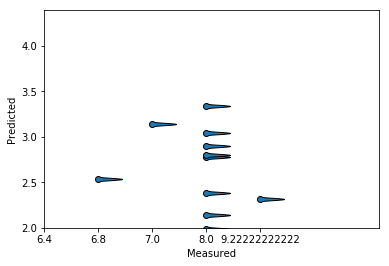

In [163]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

predicted = cross_val_predict(wr_yd_lm, X_test, y_test, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set(xlim=(40, None))
ax.set(ylim=(2, None))
plt.show()

In [110]:
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, wr_yd_lm.coef_[0][idx]))

The coefficient for fortyyd is -292.084515795
The coefficient for threecone is 278.789563619
The coefficient for vertical is -2.31836712941
The coefficient for bench is -8.76418808824
The coefficient for broad is 4.0818471771
The coefficient for heightinchestotal is -11.9923452002
The coefficient for weight is 2.65150123012


In [111]:
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, wr_yd_lm_ridge.coef_[0][idx]))

The coefficient for fortyyd is -166.123031161
The coefficient for threecone is 207.675864009
The coefficient for vertical is -2.01685698679
The coefficient for bench is -8.22360793261
The coefficient for broad is 4.86158682729
The coefficient for heightinchestotal is -12.047479035
The coefficient for weight is 2.50251951323


(4.2, 4.9)

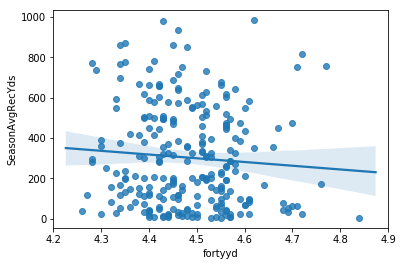

In [112]:
sns.regplot(x="fortyyd", y="SeasonAvgRecYds", data=df_wr_clean)
plt.xlim(4.20, 4.90)

(6.0, 8.0)

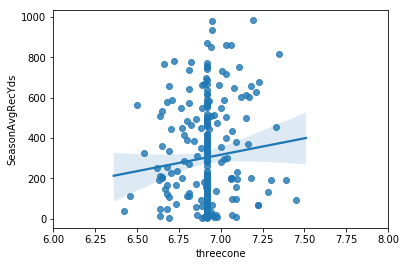

In [113]:
sns.regplot(x="threecone", y="SeasonAvgRecYds", data=df_wr_clean)
plt.xlim(6.0, 8.0)

(65.0, 80.0)

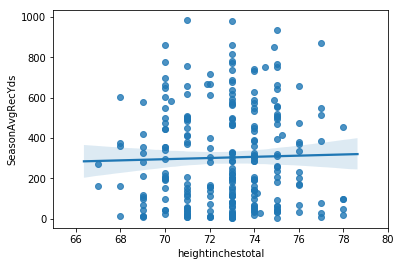

In [114]:
sns.regplot(x="heightinchestotal", y="SeasonAvgRecYds", data=df_wr_clean)
plt.xlim(65.0, 80.0)

#### Repeat model creation for TD target

In [115]:
wr_td_lm = LinearRegression()
wr_td_lm_lasso = Lasso()
wr_td_lm_ridge = Ridge()

In [116]:
X = df_wr_clean[['fortyyd', 'threecone', 'vertical', 'bench','broad', 'heightinchestotal', 'weight']]
y = df_wr_clean[['SeasonAvgRecTDs']]

In [117]:
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y,test_size = 0.33, random_state = 5)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(169, 7)
(84, 7)
(169, 1)
(84, 1)


In [118]:
wr_td_lm.fit(X_train,y_train)
wr_td_lm_lasso.fit(X_train,y_train)
wr_td_lm_ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [119]:
print wr_td_lm.score(X_test, y_test)
print wr_td_lm_lasso.score(X_test, y_test)
print wr_td_lm_ridge.score(X_test, y_test)

-0.0113217775267
0.0261472136777
-0.00519882393402


In [120]:
print "Linear Regression"
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, wr_td_lm.coef_[0][idx]))

Linear Regression
The coefficient for fortyyd is -3.45265663011
The coefficient for threecone is 2.02437822177
The coefficient for vertical is -0.00751616785215
The coefficient for bench is -0.0611636534774
The coefficient for broad is 0.0312475092705
The coefficient for heightinchestotal is -0.0911544458058
The coefficient for weight is 0.0400792946325


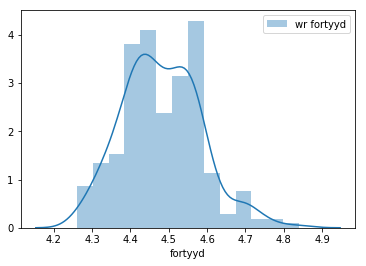

In [122]:
sns.distplot(df_wr_clean['fortyyd'], label="wr fortyyd")
plt.legend()